# Tutorial 04 Correlation
## Exploration A

In [12]:
"""
Libaries that are used 
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

# Question 1

### scatter plot of two high volume pages 

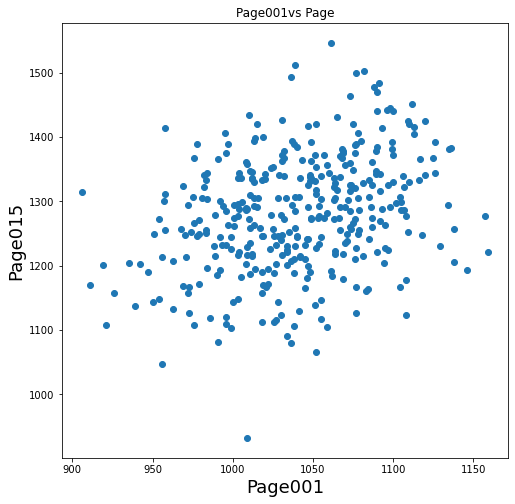

In [7]:
selected = ['001', '015']

for i, name_i in enumerate(selected):
    for j in range(i+1, len(selected)):
        name_j=selected[j]
        plt.figure(figsize=(8,8))
        plt.scatter(data[name_i], data[name_j])
        plt.title('Page' + name_i + 'vs Page')
        plt.xlabel('Page' + name_i, fontsize=18)
        plt.ylabel('Page' + name_j, fontsize=18)
        plt.show()

# Question 2

### scatter subplots of pairs of medium pages againts each other

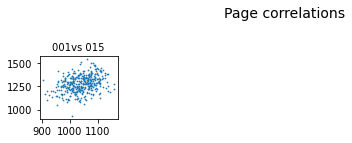

In [8]:
selected2 = ['002','003','004','010','048','080','155','156']

counter = 1 
fig = plt.figure(figsize=(8,8))
fig.suptitle('Page correlations', fontsize=14, position=(0.5,1.0))
for i, name_i in enumerate(selected):
    for j in range(i+1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(6,6, counter)
        sub.set_title(name_i + 'vs ' + name_j, fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


# Question 3

### confirm findings with a heatmap

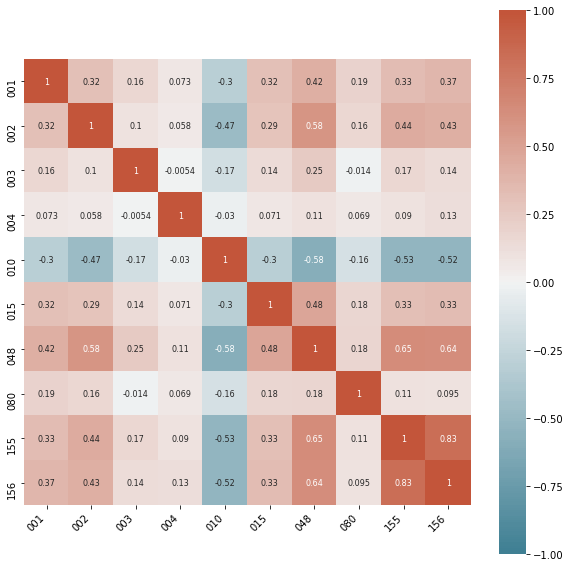

In [16]:
selected3 = selected + selected2
selected3 = data.columns[data.sum()> 5000]

plt.figure(figsize=(10,10))
corr = data[selected3].corr()
ax = sns.heatmap(corr, vmin=-1, vmax = 1, center = 0, cmap=sns.diverging_palette(220,20,n=200),
                 square=True,
                 annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Question 4

## visualise coefficent greater then 0.5 and show

<function matplotlib.pyplot.show(close=None, block=None)>

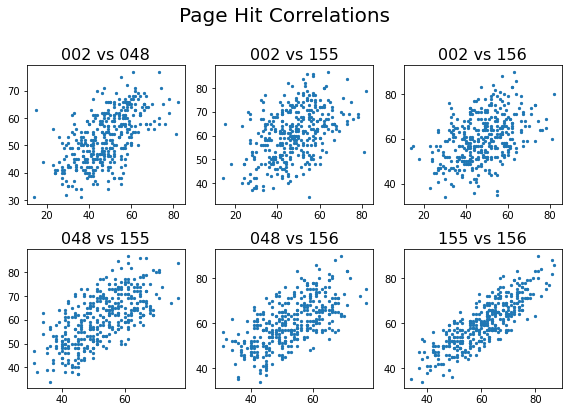

In [23]:
selected4 =['002', '048','155','156']

counter = 1
fig = plt.figure(figsize=(8,8))
fig.suptitle('Page Hit Correlations', fontsize=20, position=(0.5,1.0))
for i, name_i in enumerate(selected4):
    for j in range(i + 1, len(selected4)):
        name_j = selected4[j]
        sub = fig.add_subplot(3,3,counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=16)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show

# Question 5

## line plots with trends for positive correlated pages

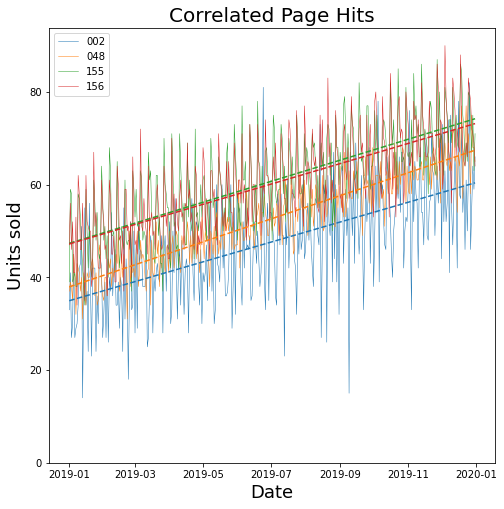

In [28]:
period = 7
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected4], linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#plt.plot(rolling_average[selected4], linewidth=2)
plt.gca().set_prop_cycle(None)
for name in selected4:
     x = np.arange(len(data[name]))
     z = np.polyfit(x, data[name], 1)
     trend = np.poly1d(z)
     plt.plot(data.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Correlated Page Hits', fontsize=20)
plt.legend(selected4, loc=2)
plt.show()

# Question 6

## inverse correlations 

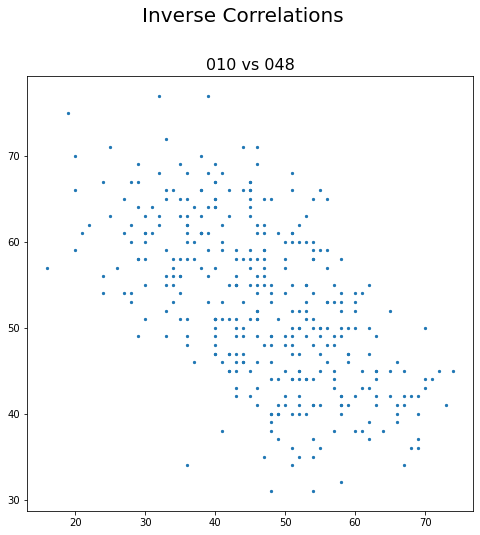

In [31]:
selected5 = ['010','048']

counter = 1 
fig = plt.figure(figsize=(8,8))
fig.suptitle('Inverse Correlations', fontsize=20, position=(0.5,1.0))
for i, name_i in enumerate(selected5):
    for j in range(i + 1, len(selected5)):
        name_j = selected5[j]
        sub = fig.add_subplot(1, 1, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=16)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

# Question 7 

## draw line plots w-end lines 

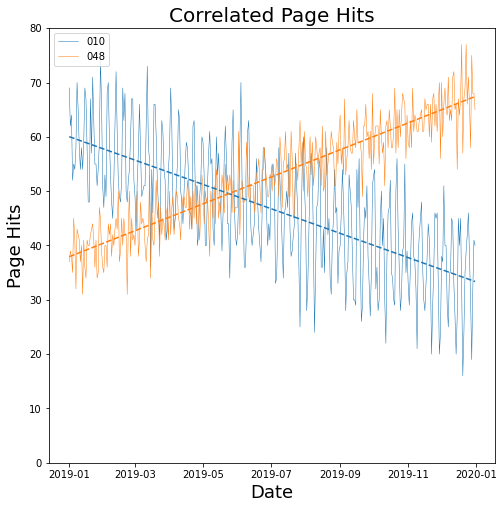

In [36]:
plt.figure(figsize=(8,8))
plt.plot(data[selected5], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected5:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name],1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Correlated Page Hits', fontsize =20)
plt.legend(selected5, loc=2)
plt.show()